In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df.sample(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
104435,1913-10-01,14.132,0.669,Jinan,China,36.17N,117.35E
32796,1845-12-01,NaN,NaN,Brasília,Brazil,15.27S,47.50W
110368,1851-12-01,14.909,2.097,Kanpur,India,26.52N,80.60E
157858,1965-09-01,12.961,0.154,Moscow,Russia,55.45N,36.85E
191188,2007-10-01,12.944,0.409,Rome,Italy,42.59N,13.09E
238041,1919-02-01,1.238,0.800,Xian,China,34.56N,108.97E
142793,1947-02-01,25.645,0.243,Manila,Philippines,15.27N,120.83E
51776,1752-05-01,NaN,NaN,Chicago,United States,42.59N,87.27W
79258,1854-10-01,NaN,NaN,Harare,Zimbabwe,18.48S,30.42E
109317,1982-02-01,23.730,0.266,Kano,Nigeria,12.05N,8.22E


In [5]:
df.shape

(239177, 7)

In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
dt                               239177 non-null object
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [8]:
count_nan = len(df) - df.count()
print(count_nan)

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


In [9]:
col = list(df.columns.values)
print(col)

['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


In [10]:
country = list(df['Country'].unique())
print('Number of countries = ',len(country),'\n')

j=0
city=[]
for i in country:
    df_temp = df.loc[df['Country'] == i]
    city.append(list(df_temp['City'].unique()))
    print('Number of cities = ',len(city[j])," in ",i)
    j+=1

print('\n\nCountry = ',country,'\n\n')
print('City = ',city)

Number of countries =  49 

Number of cities =  1  in  Côte D'Ivoire
Number of cities =  1  in  Ethiopia
Number of cities =  14  in  India
Number of cities =  1  in  Syria
Number of cities =  3  in  Egypt
Number of cities =  3  in  Turkey
Number of cities =  1  in  Iraq
Number of cities =  1  in  Thailand
Number of cities =  6  in  Brazil
Number of cities =  1  in  Germany
Number of cities =  2  in  Colombia
Number of cities =  2  in  South Africa
Number of cities =  1  in  Morocco
Number of cities =  16  in  China
Number of cities =  3  in  United States
Number of cities =  1  in  Senegal
Number of cities =  1  in  Tanzania
Number of cities =  1  in  Bangladesh
Number of cities =  3  in  Pakistan
Number of cities =  1  in  Zimbabwe
Number of cities =  1  in  Vietnam
Number of cities =  3  in  Nigeria
Number of cities =  2  in  Indonesia
Number of cities =  2  in  Saudi Arabia
Number of cities =  1  in  Afghanistan
Number of cities =  1  in  Ukraine
Number of cities =  1  in  Congo (De

In [11]:
date = list(df['dt'].unique())

year = []
for i in date:
    year.append(int(i[:4]))
year = sorted(list(set(year)))
print('Number of years = ',len(year))
print('\nYear = ',year)

month=[]
for i in date:
    if(int(i[:4])==year[100]):
        month.append(int(i[5:7]))
print('\n\nMonth = ',month)

day=[]
for i in date:
    if(int(i[:4])==year[100]):
        day.append(int(i[8:]))
print('\n\nDay = ',list(set(day)))

Number of years =  271

Year =  [1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1

In [12]:
#Data Cleaning

pd.options.mode.chained_assignment = None #To remove SettingWithCopyWarning
new_df = pd.DataFrame()
for i in range(len(country)): #len(country)
    df_country = df[df['Country'] == country[i]]

    for j in range(len(city[i])): #len(city[i])
        df_city = df_country[df_country['City'] == city[i][j]]
        df_city = df_city.reset_index(drop=True)

        avgTemp = df_city['AverageTemperature']
        pos=1
        while(np.isnan(avgTemp[0])):
            if(not(np.isnan(avgTemp[pos]))):
                avgTemp.iloc[0] = avgTemp.iloc[pos]
            pos+=1
            
        pos=len(avgTemp)-2
        while(np.isnan(avgTemp[len(avgTemp)-1])):
            if(not(np.isnan(avgTemp[pos]))):
                avgTemp.iloc[len(avgTemp)-1] = avgTemp.iloc[pos]
            pos-=1
            
            
        avgTempUncty = df_city['AverageTemperatureUncertainty']

        pos=1
        while(np.isnan(avgTempUncty[avgTempUncty.index[0]])):
            if(not(np.isnan(avgTempUncty[pos]))):
                avgTemp.iloc[0] = avgTempUncty.iloc[pos]
            pos+=1
            
        pos=len(avgTempUncty)-2
        while(np.isnan(avgTempUncty[len(avgTempUncty)-1])):
            if(not(np.isnan(avgTempUncty[pos]))):
                avgTempUncty.iloc[len(avgTempUncty)-1] = avgTempUncty.iloc[pos]
            pos-=1

        new_df = new_df.append(df_city.interpolate(),ignore_index=True)

df = new_df

print("Data Cleaned : DataFrame = df")

Data Cleaned : DataFrame = df


In [13]:
print("After Data is cleaned : \n")
count_nan = len(df) - df.count()
print(count_nan)

After Data is cleaned : 

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


In [14]:
india_city = city[2]
df_india = pd.DataFrame()
for i in india_city:
    df_india = df_india.append(df.loc[df['City']==i],ignore_index=True)
    
india_avgTemp = []
for i in india_city:
    india_avgTemp.append(df_india.loc[df_india['City']==i]['AverageTemperature'].mean())
    
india_avgTempUncty = []
for i in india_city:
    india_avgTempUncty.append(df_india.loc[df_india['City']==i]['AverageTemperatureUncertainty'].mean())

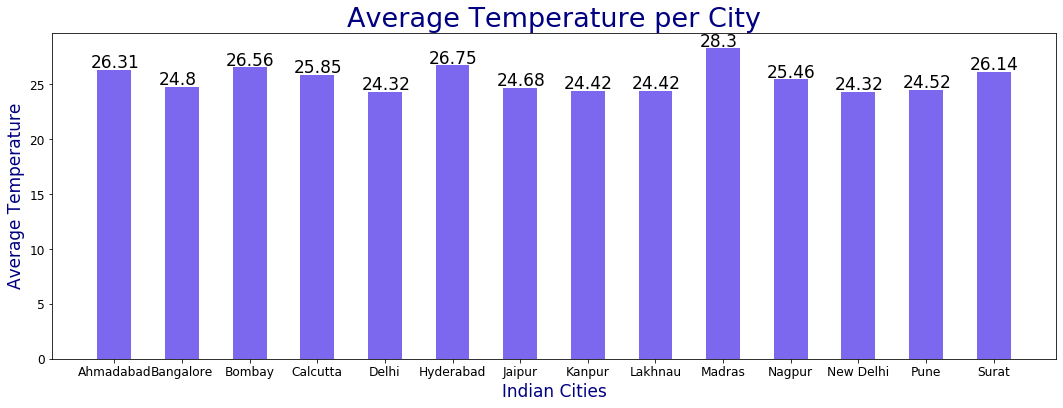

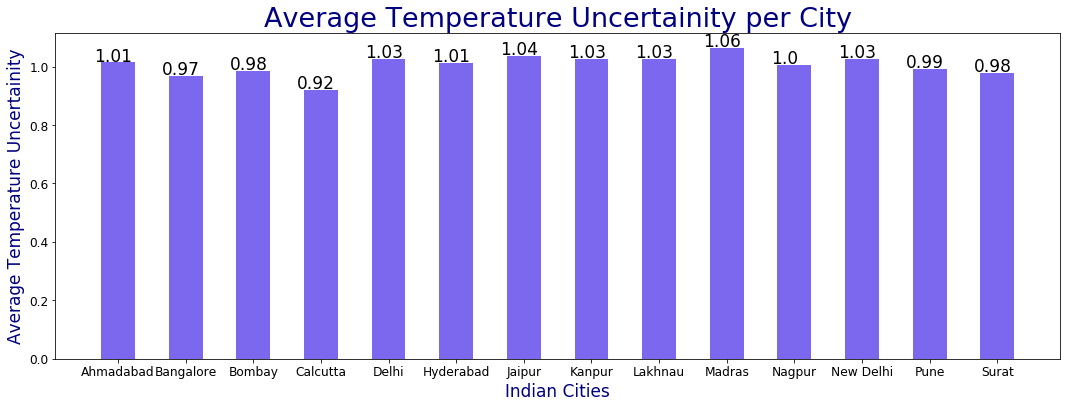

In [15]:
img=1
plt.figure(figsize=(18,6),frameon=False)
plt.bar(india_city,india_avgTemp,width=0.5,color='mediumslateblue')

for i in range(len(india_city)):
     plt.text(i-0.35,india_avgTemp[i]+0.2,round(india_avgTemp[i],2),fontsize=17)

plt.xlabel('Indian Cities',fontsize=17,color='navy')
plt.ylabel('Average Temperature',fontsize=17,color='navy')
plt.title('Average Temperature per City',fontsize=27,color='navy')
plt.tick_params(labelsize='12.2', labelcolor='black')

plt.savefig(str(img)+'.png',dpi=200)
img+=1

plt.figure(figsize=(18,6),frameon=False)
plt.bar(india_city,india_avgTempUncty,width=0.5,color='mediumslateblue')

for i in range(len(india_city)):
     plt.text(i-0.35,india_avgTempUncty[i]+0.005,round(india_avgTempUncty[i],2),fontsize=17)

plt.xlabel('Indian Cities',fontsize=17,color='navy')
plt.ylabel('Average Temperature Uncertainity',fontsize=17,color='navy')
plt.title('Average Temperature Uncertainity per City',fontsize=27,color='navy')
plt.tick_params(labelsize='12.2', labelcolor='black')

plt.savefig(str(img)+'.png',dpi=200)
img+=1

In [16]:
data=[]
heat_globe = pd.DataFrame(index=country)

for i in range(1900,2001,20):
    for j in country:
        q = df.loc[df['Country']==j]
        data.append(round(np.mean(q.loc[q['dt'] == str(i)+'-01-01']['AverageTemperature'].values),2))
    heat_globe[str(i)] = data
    data=[]

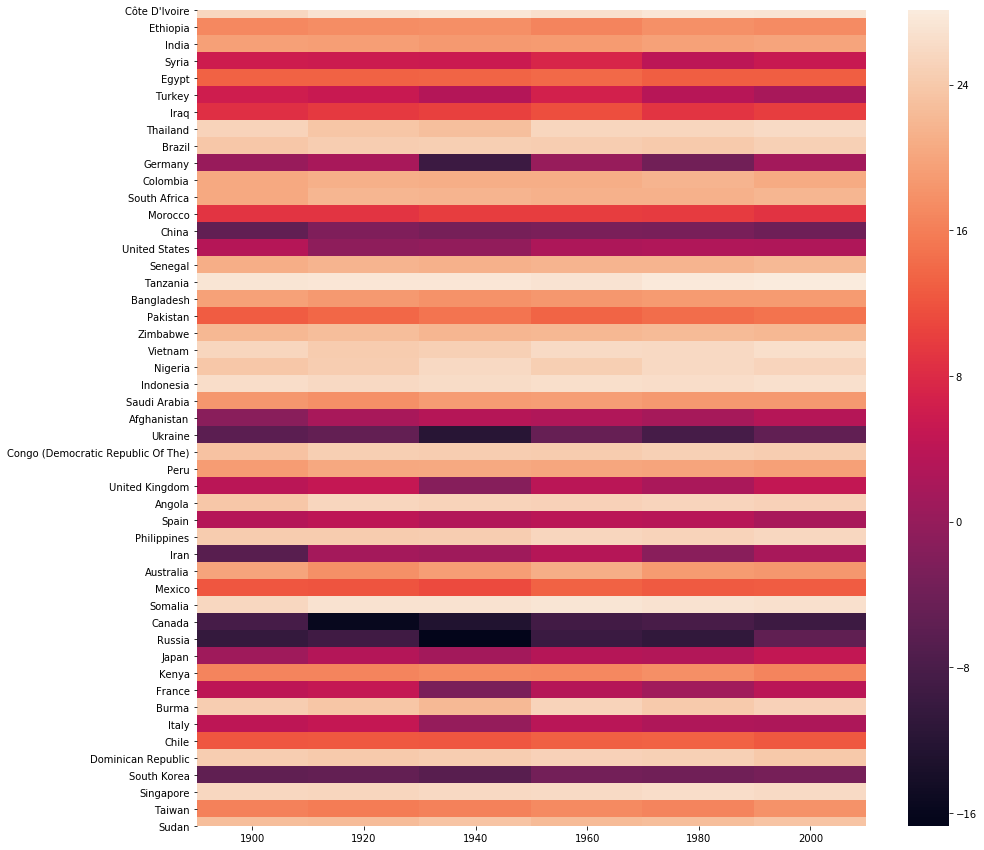

In [17]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(heat_globe)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

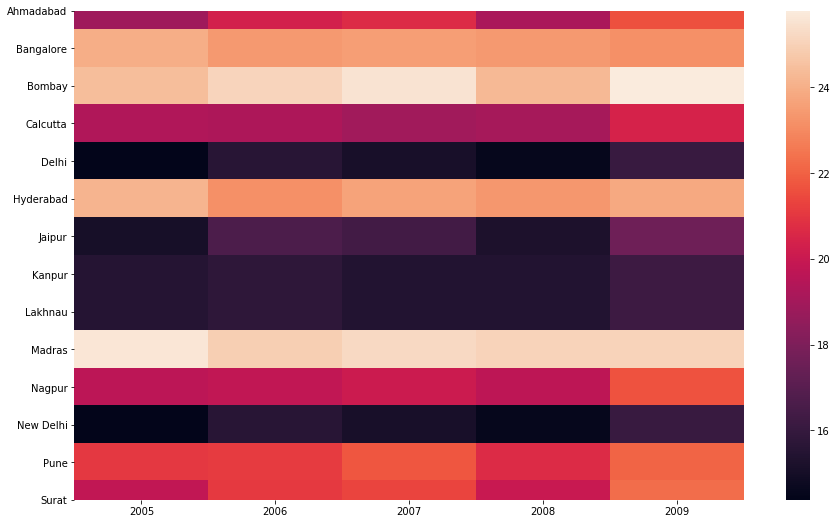

In [18]:
heat_india = pd.DataFrame(index=india_city)
for i in range(5,10):
    data = df_india.loc[df_india['dt'] == '200'+str(i)+'-01-01']['AverageTemperature'].values
    heat_india['200'+str(i)] = data
    
plt.figure(figsize=(15,9))
ax = sns.heatmap(heat_india)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

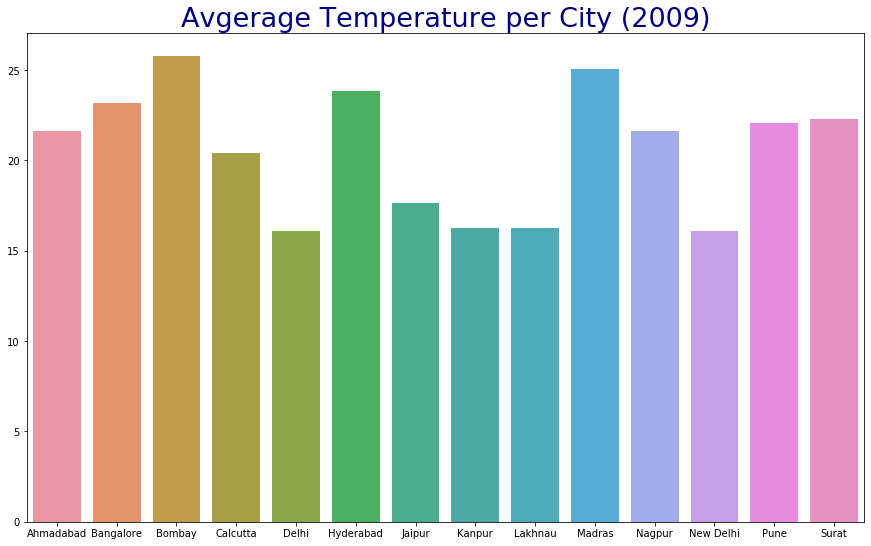

In [19]:
plt.figure(figsize=(15,9))
sns.barplot(x=india_city,y=heat_india['2009'].values)
plt.title('Avgerage Temperature per City (2009)',fontsize=27,color='navy')
plt.savefig(str(img)+'.png',dpi=200)
img+=1

In [20]:
data=[]
q = df.loc[df['City']=='Madras']
for i in range(1850,2001,10):
    data.append(round(list(q.loc[q['dt'] == str(i)+'-01-01']['AverageTemperature'].values)[0],2))

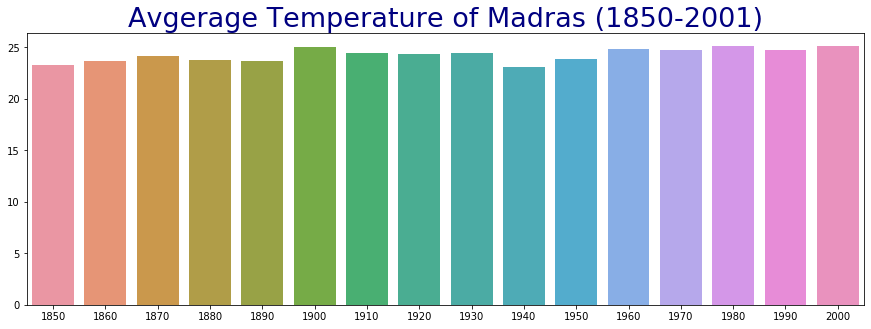

In [21]:
plt.figure(figsize=(15,5))
plt.title('Avgerage Temperature of Madras (1850-2001)',fontsize=27,color='navy')
sns.barplot(x=list(range(1850,2001,10)),y=data)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

In [22]:
import scipy.stats as stats
print("\n\t\t\t\t\tMadras\n\n")

data=[]
q = df.loc[df['City']=='Madras']
for i in range(1850,2001):
    data.append(round(list(q.loc[q['dt'] == str(i)+'-01-01']['AverageTemperature'].values)[0],2))

index=list(range(1850,2001))
madras = pd.DataFrame(data=data,index=index,columns=['Temperature'])

madras


					Madras




,Temperature
1850,23.31
1851,23.80
1852,24.13
1853,24.73
1854,23.62
...,...
1996,25.14
1997,24.32
1998,26.40
1999,24.53


G:\himanshu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


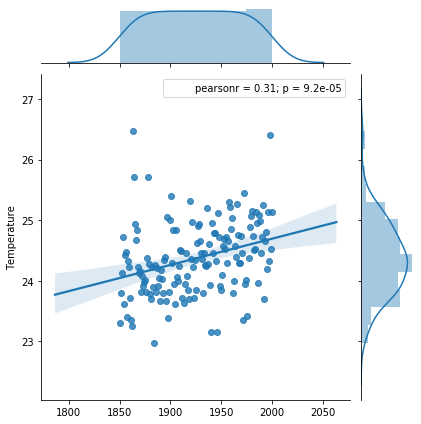

In [23]:
sns.jointplot(x=index,y="Temperature",data=madras,kind="reg").annotate(stats.pearsonr)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

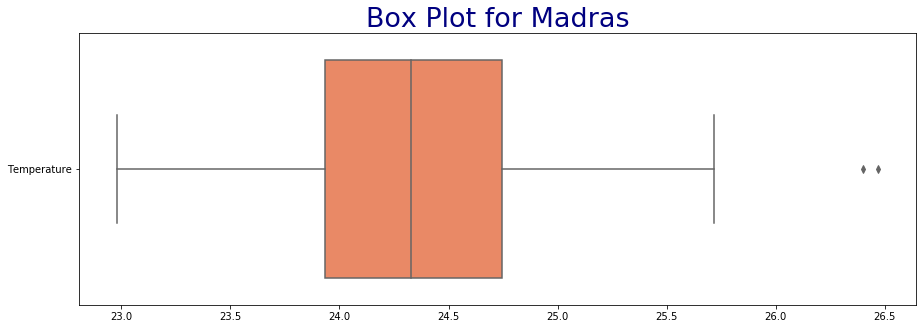

In [24]:
plt.figure(figsize=(15,5))
plt.title('Box Plot for Madras',fontsize=27,color='navy')
sns.boxplot(data=madras,orient='h',color='coral')
plt.savefig(str(img)+'.png',dpi=200)
img+=1


					Bombay




G:\himanshu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


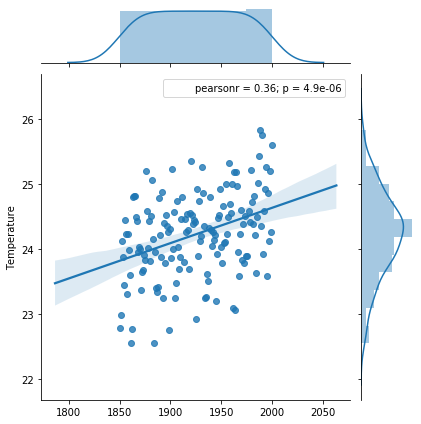

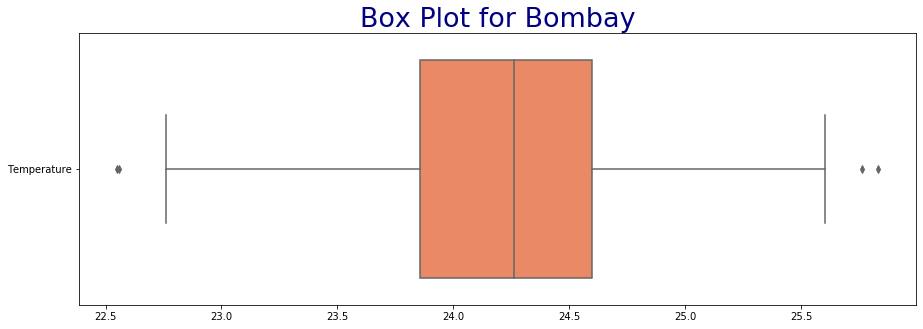

In [25]:
print("\n\t\t\t\t\tBombay\n\n")

data=[]
q = df.loc[df['City']=='Bombay']
for i in range(1850,2001):
    data.append(round(list(q.loc[q['dt'] == str(i)+'-01-01']['AverageTemperature'].values)[0],2))

index=list(range(1850,2001))
bombay = pd.DataFrame(data=data,index=index,columns=['Temperature'])
sns.jointplot(x=index,y="Temperature",data=bombay,kind="reg").annotate(stats.pearsonr)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

plt.figure(figsize=(15,5))
plt.title('Box Plot for Bombay',fontsize=27,color='navy')
sns.boxplot(data=bombay,orient='h',color='coral')
plt.savefig(str(img)+'.png',dpi=200)
img+=1


					Bangalore




G:\himanshu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


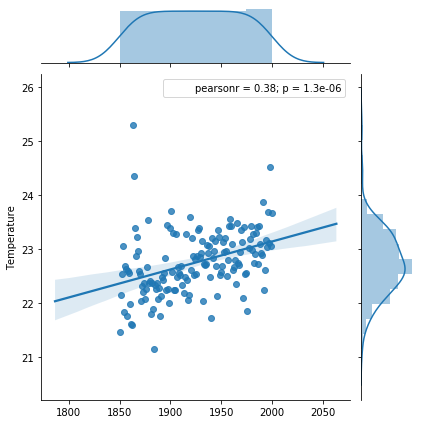

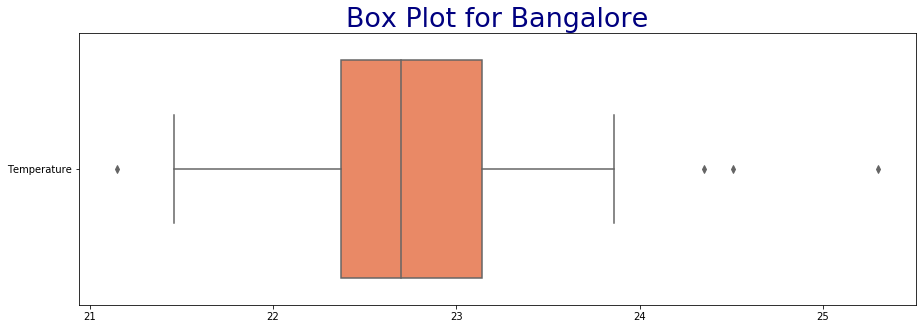

In [26]:
print("\n\t\t\t\t\tBangalore\n\n")

data=[]
q = df.loc[df['City']=='Bangalore']
for i in range(1850,2001):
    data.append(round(list(q.loc[q['dt'] == str(i)+'-01-01']['AverageTemperature'].values)[0],2))

index=list(range(1850,2001))
bangalore = pd.DataFrame(data=data,index=index,columns=['Temperature'])
sns.jointplot(x=index,y="Temperature",data=bangalore,kind="reg").annotate(stats.pearsonr)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

plt.figure(figsize=(15,5))
plt.title('Box Plot for Bangalore',fontsize=27,color='navy')
sns.boxplot(data=bangalore,orient='h',color='coral')
plt.savefig(str(img)+'.png',dpi=200)
img+=1

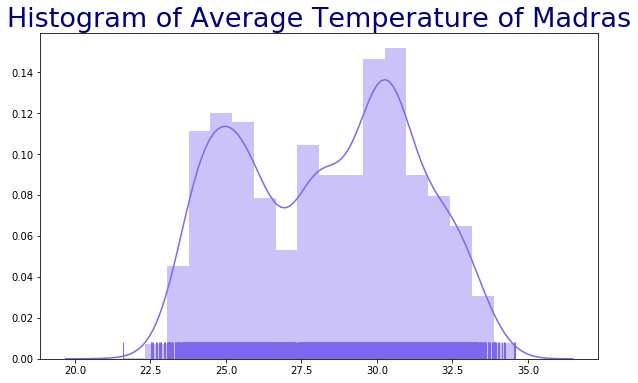

In [27]:
df_madras = df_india.loc[df_india['City']=='Madras']
madras = list(df_india.loc[df_india['City']=='Madras']['AverageTemperature'].values)
plt.figure(figsize=(10,6))
#plt.hist(madras,bins=25,color = 'mediumslateblue')
plt.title('Histogram of Average Temperature of Madras',fontsize=27,color='navy')
sns.distplot(madras,color = 'mediumslateblue',rug=True)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

madras_population_mean = np.mean(df_madras['AverageTemperature'])
madras_population_std = np.std(df_madras['AverageTemperature'])

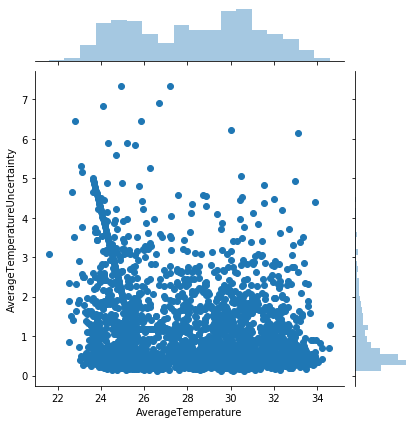

In [28]:
sns.jointplot(x=df_madras['AverageTemperature'], y=df_madras['AverageTemperatureUncertainty'], data=df_madras)
plt.savefig(str(img)+'.png',dpi=200)
img+=1

In [29]:
#Central Limit Theorem

In [30]:
#simple random sampling
from random import sample,seed
from statistics import mean
from statistics import stdev
from math import sqrt

seed(2)
n = df_madras.shape[0]  #Population Size
print("Population Size = ",n)

def sampling_distribution(s,t):
    global img
    madras_mean = []
    no_of_samples = s
    no_of_times = t

    for i in range(no_of_times):
        random_index = sample(range(df_madras.shape[0]), no_of_samples)
        madras_mean.append(df_madras.iloc[random_index]['AverageTemperature'].values.mean())

    plt.figure(figsize=(10,6))
    #plt.hist(madras_mean,bins=25,color = 'mediumslateblue')
    sns.distplot(madras_mean,color = 'mediumslateblue',rug=True)
    plt.title('Sampling Distribution of Sample Mean',fontsize=27,color='navy')
    plt.savefig(str(img)+'.png',dpi=200)
    img+=1;
    
    return mean(madras_mean),stdev(madras_mean)

def result(s,t):
    sample_mean,sample_std = sampling_distribution(s,t)
    print('For,\n\t Number of Samples = ',s,'\n\t Number of Times = ',t)

    print('\n\nMadras Population Mean = ',round(madras_population_mean,4))
    print('Mean of sample mean = ',round(sample_mean,4))
    print("\nHence, Mean of sample mean = Population Mean\n\n")

    print('Standard Error = ',round(sample_std / sqrt(s),4))

    print("\n\n\t\t\t\tThis proves Central Limit Theorem.\n\n\n")

Population Size =  2613


For,
	 Number of Samples =  500 
	 Number of Times =  500


Madras Population Mean =  28.2975
Mean of sample mean =  28.2969

Hence, Mean of sample mean = Population Mean


Standard Error =  0.005


				This proves Central Limit Theorem.





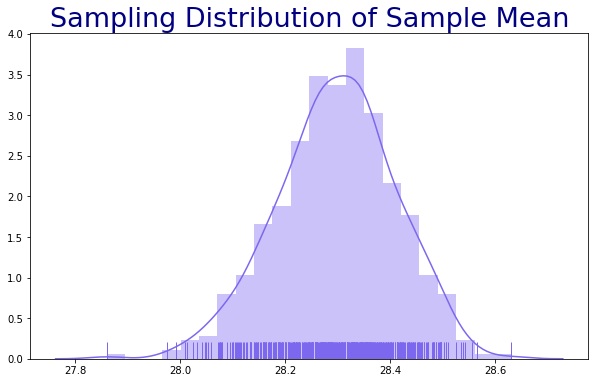

In [31]:
#result(no_of_samples,no_of_times)
result(500,500)

For,
	 Number of Samples =  1000 
	 Number of Times =  500


Madras Population Mean =  28.2975
Mean of sample mean =  28.2956

Hence, Mean of sample mean = Population Mean


Standard Error =  0.0022


				This proves Central Limit Theorem.





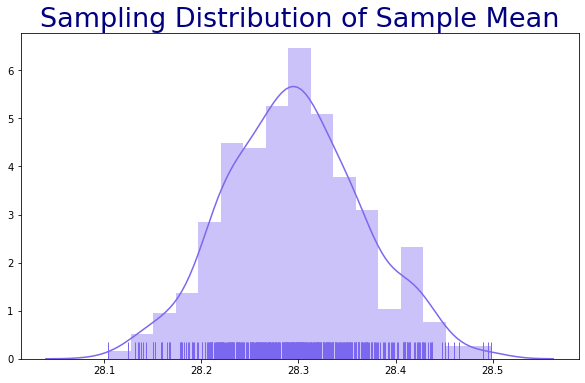

In [32]:
result(1000,500)

For,
	 Number of Samples =  1000 
	 Number of Times =  1000


Madras Population Mean =  28.2975
Mean of sample mean =  28.3009

Hence, Mean of sample mean = Population Mean


Standard Error =  0.0023


				This proves Central Limit Theorem.





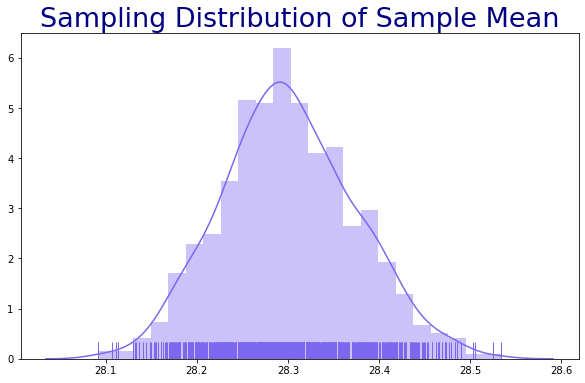

In [33]:
result(1000,1000)

For,
	 Number of Samples =  2000 
	 Number of Times =  1000


Madras Population Mean =  28.2975
Mean of sample mean =  28.2974

Hence, Mean of sample mean = Population Mean


Standard Error =  0.0007


				This proves Central Limit Theorem.





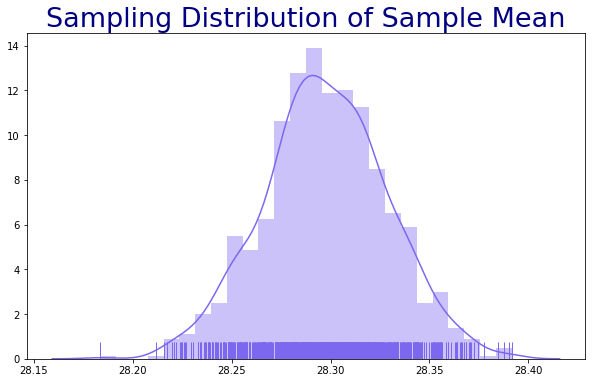

In [34]:
result(2000,1000)

For,
	 Number of Samples =  2000 
	 Number of Times =  2000


Madras Population Mean =  28.2975
Mean of sample mean =  28.2967

Hence, Mean of sample mean = Population Mean


Standard Error =  0.0007


				This proves Central Limit Theorem.





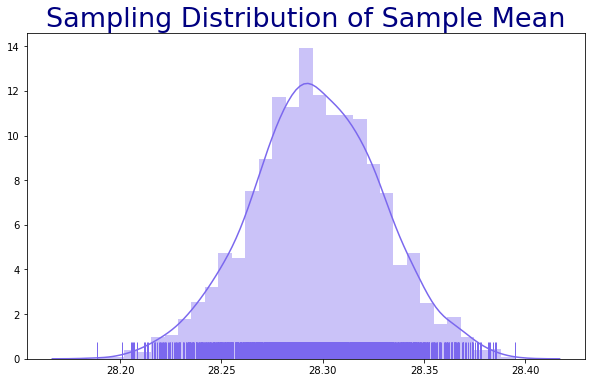

In [35]:
result(2000,2000)

In [36]:
#Confidence Interval

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random
from random import seed

population = df_madras['AverageTemperature'].values
pop_mean = np.mean(population)

def confidence_interval(s,t,cc):
    global img
    seed(8)
    madras_sample_mean = []
    intervals = []
    count = 0
    for i in range(t):
        #a sample of size s will be taken from the df_madras
        madras_sample = random.sample(list(population), s)
        #mean of the samples appended to madras_sample_mean
        madras_sample_mean.append(np.mean(madras_sample))
        #ci contains lower and upper bound of interval with cc confidence
        ci = norm.interval(cc, np.mean(madras_sample), 
                            np.std(madras_sample, ddof =1)/sqrt(s))
        intervals.append(ci)
        #upcount only if pop_mean lies in confidence interval
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
            
    print('Proportion of CIs covering Pop mean', count/t)
    plt.figure(figsize=(15,5))
    plt.title('Confidence Interval',fontsize=27,color='navy')
    #print the horizontal line which is pop_mean
    plt.hlines(y = pop_mean, xmin = 0, xmax = t, color ='b')
    #print the sample lines with their means indicated as 'o'
    plt.errorbar(np.arange(0.1, t, 1), madras_sample_mean, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals],ecolor='coral')
    plt.savefig(str(img)+'.png',dpi=200)
    img+=1;
    plt.show()

Proportion of CIs covering Pop mean 0.98


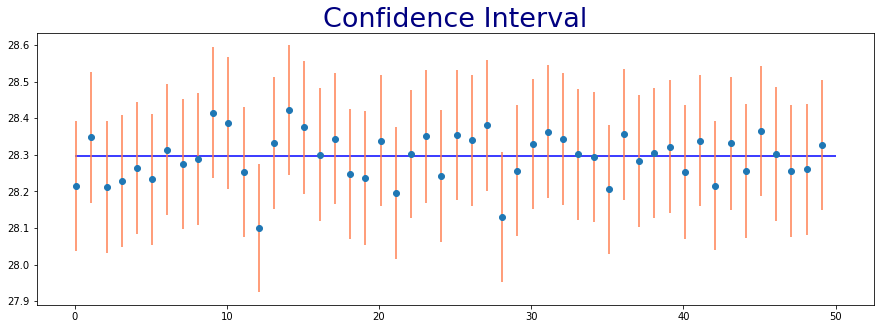

In [38]:
confidence_interval(1000, 50, 0.95)

Proportion of CIs covering Pop mean 0.99


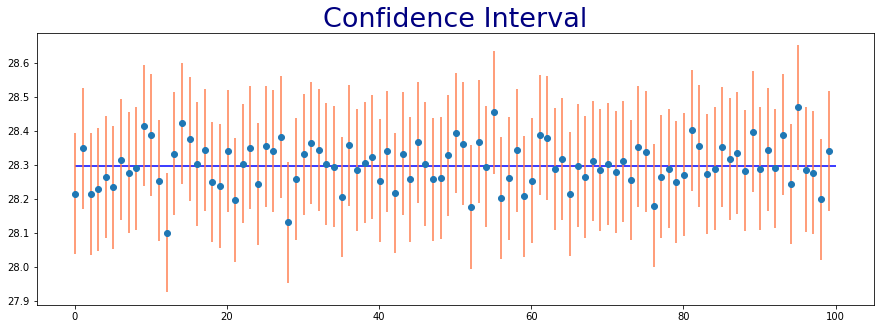

In [39]:
confidence_interval(1000, 100, 0.95)

Proportion of CIs covering Pop mean 0.96


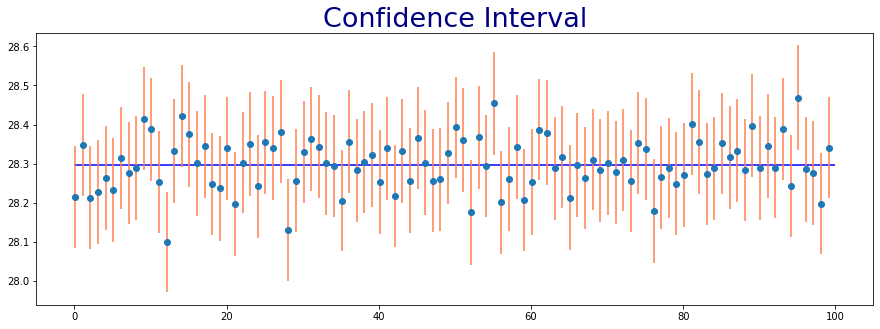

In [40]:
confidence_interval(1000, 100, 0.85)

Proportion of CIs covering Pop mean 0.9933333333333333


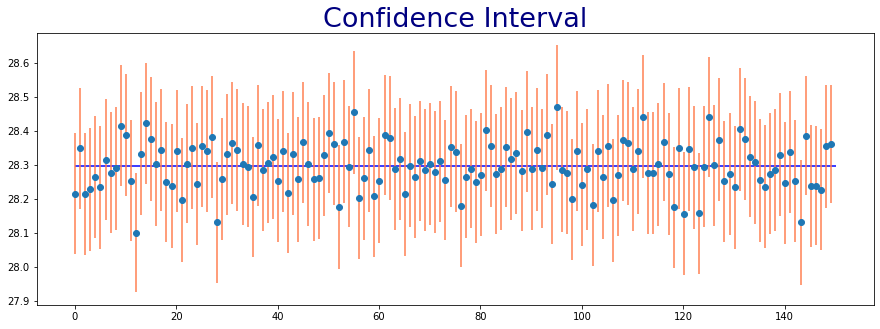

In [41]:
confidence_interval(1000, 150, 0.95)

In [42]:
#CI for population where 85% of the people say YES to a certain question
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

population = list(df_madras['AverageTemperature'].values)

#parameters....population, required_CI, sample_size, no_of_samples
def CI(pop, cc, s, t):
    global img
    plt.figure(figsize=(10,5))
    print("\nConfidence Interval :", cc, " and Sample Size :", s)
    pop_mean = round(np.mean(pop),4)
    print('\nActual Mean :',pop_mean)
    
    #calculation of same using CI
    samp_means = []      #mean of all the samples 
    for i in range(t):
        samp_means.append(np.mean(sample(population, s)))
    #calculation of interval
    print('\nMean of Samples :', round(np.mean(samp_means),4))
    pop_stdev = round(np.std(samp_means) / math.sqrt(s),4)
    print('\nStandard Error = ',pop_stdev)
    z = st.norm.ppf(cc)
    print(z)
    print("\nConfidence Interval :", pop_mean, "+-", z*pop_stdev)
    #plt.hist(samp_means)
    ax = sns.distplot(samp_means,color = 'mediumslateblue',rug=True)

    plt.savefig(str(img)+'.png',dpi=200)
    img+=1;
    plt.show()

    
    plt.style.use("seaborn-darkgrid")

    plt.figure(figsize=(10,5))
    minimum = pop_mean - z*pop_stdev
    maximum = pop_mean + z*pop_stdev
    samp_means = np.asarray(samp_means)
    kde = st.gaussian_kde(samp_means)
    pos = np.linspace(samp_means.min(), samp_means.max(), 101)
    plt.plot(pos, kde(pos))
    #shade = np.linspace(pop_mean-z*pop_stdev,pop_mean+z*pop_stdev, 101)
    shade = np.linspace(minimum,maximum, 101)
    plt.fill_between(shade,kde(shade), alpha=0.5)
    plt.ylim(0,None)
    plt.savefig(str(img)+'.png',dpi=200)
    img+=1;
    plt.show()


Confidence Interval : 0.95  and Sample Size : 1000

Actual Mean : 28.2975

Mean of Samples : 28.3048

Standard Error =  0.0024
1.6448536269514722

Confidence Interval : 28.2975 +- 0.003947648704683533


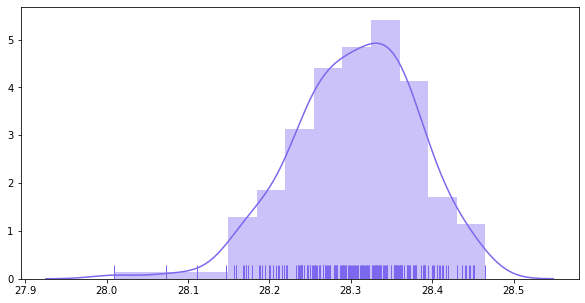

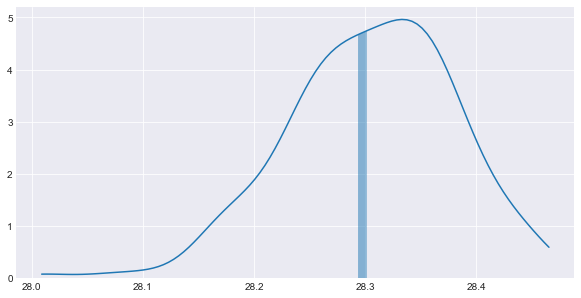

In [43]:
CI(population, 0.95, 1000, 200)


Confidence Interval : 0.95  and Sample Size : 1000

Actual Mean : 28.2975

Mean of Samples : 28.2943

Standard Error =  0.0023
1.6448536269514722

Confidence Interval : 28.2975 +- 0.003783163341988386


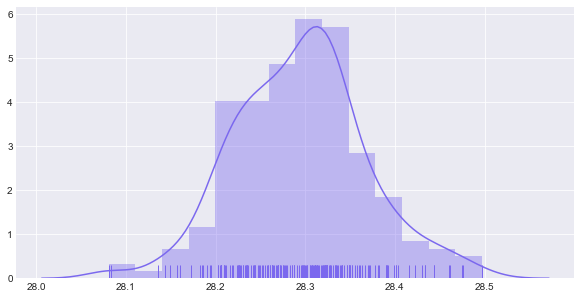

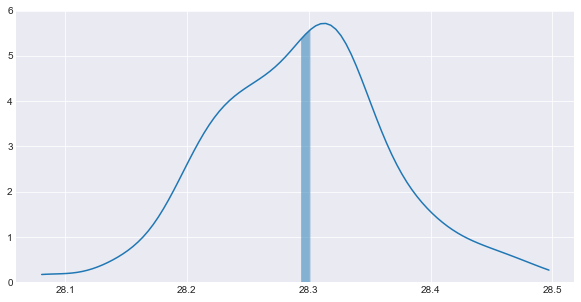

In [44]:
CI(population, 0.95, 1000, 200)


Confidence Interval : 0.85  and Sample Size : 500

Actual Mean : 28.2975

Mean of Samples : 28.3021

Standard Error =  0.0053
1.0364333894937898

Confidence Interval : 28.2975 +- 0.0054930969643170865


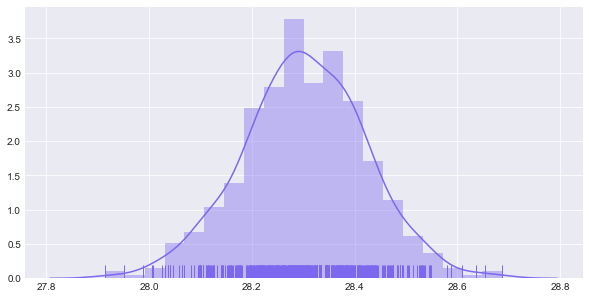

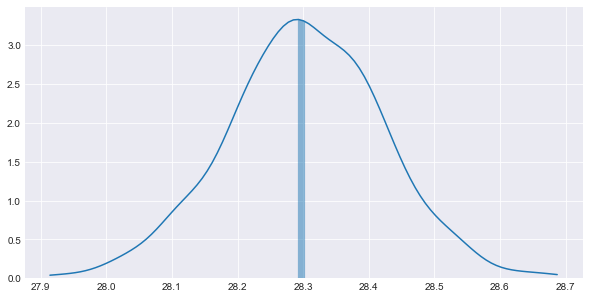

In [45]:
CI(population, 0.85, 500, 500)